# PLANT  DISEASE CLASSIFICATION - RESNET 18 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import models,transforms
from torch.autograd import Variable

from dl4cv.classifiers.Resnet18_network import ClassificationNetwork
from dl4cv.data_utils import ClassificationData

torch.set_default_tensor_type('torch.FloatTensor')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Train and validation data

In [2]:
import os
plant_type_dataset_folder = os.path.join(os.path.join(os.path.expanduser('~')), \
                              'DL4CV_Final_Project/partitioned_dataset_dev/segmented/Plant_type_set')

#plant_type_train_data = ClassificationData(root = plant_type_dataset_folder,
#                              image_list='Training_set.txt')

plant_type_val_data = ClassificationData(root = plant_type_dataset_folder,
                            image_list='Validation_set.txt')

plant_type_test_data = ClassificationData(root = plant_type_dataset_folder,
                            image_list='Test_set.txt')

Validation size: 2698
Test size: 655
Img size: torch.Size([3, 240, 240])
8


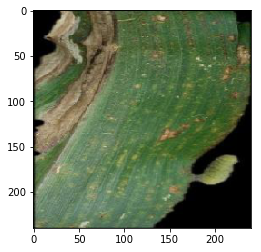

True


In [3]:
#print("Train size: %i" % len(plant_type_train_data))
print("Validation size: %i" % len(plant_type_val_data))
print("Test size: %i" % len(plant_type_test_data))

#img, target = plant_type_train_data[1]
img, target = plant_type_val_data[1]

print("Img size: " + str(img.size()))
print(target)

plt.figure(figsize=(4,4))
plt.imshow(img.numpy().transpose(1,2,0))
plt.show()

use_gpu = torch.cuda.is_available()
print(use_gpu)

## Test Model 


In [4]:
Resnet_model = models.resnet18(pretrained = True)
plant_model = ClassificationNetwork(14)
disease_model = ClassificationNetwork(21)

"""
for param in plant_model.parameters():
    print param.requires_grad
    
for param in disease_model.parameters():
    print param.requires_grad
"""

#Testing plant and disease models
 
img1 = torch.rand((3,3,224,224))
print(type(img1))
inp = Variable(img1)
print(type(inp))
print(inp.size())

output1 = plant_model.forward(inp)
print(output1.size())

output2 = disease_model.forward(inp)
print(output2.size())

output3 = Resnet_model.forward(inp)
print(output3.size())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
<class 'torch.FloatTensor'>
<class 'torch.autograd.variable.Variable'>
torch.Size([3, 3, 240, 240])
torch.Size([3, 14])
torch.Size([3, 21])
torch.Size([3, 1000])


## Train the network

In [ ]:
from dl4cv.classifiers.Resnet18_network import ClassificationNetwork
from dl4cv.classifiers.solver import Solver

#train_loader = torch.utils.data.DataLoader(train_data, batch_size=50, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(plant_type_val_data, batch_size=50, shuffle=False, num_workers=4)
test_loader = torch.utils.data.DataLoader(plant_type_test_data, batch_size=50, shuffle=False, num_workers=4)

lr_schedule = [1e-5, 5e-4, 1e-4]
wd_schedule = [1e-4, 1e-3, 1e-2]
epochs = 10
count = 1

for lr in range(len(lr_schedule)):
    for wd in range(len(wd_schedule)):
        
        plant_model = ClassificationNetwork(14)
        solver = Solver(optim_args={"lr": lr_schedule[lr], "weight_decay": wd_schedule[wd]})
        #solver.train(model, train_loader, val_loader, log_nth=20, num_epochs=20)
        train_loss_history, val_loss_history = solver.train(plant_model, val_loader, test_loader, log_nth=20, num_epochs=epochs)
        
        plt.figure(count)
        plt.plot(range(epochs), train_loss_history, 'or-', label='Training loss')
        plt.plot(range(epochs), val_loss_history, 'xb-', label='Validation loss')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.legend(loc='upper right', shadow='True')
        plt.show()
        
        count = count + 1

START TRAIN.
[Iteration 19/54] Train loss: 2.3990
[Iteration 39/54] Train loss: 2.8027
[Epoch 0/10] Train acc/loss: 0.0890/2.5961


# Test your model
Since this dataset is very small we only provided you with a validation set.

In [ ]:
test_data = SegmentationData(root='datasets/segmentation_data', image_list='val.txt')
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=1,
                                          shuffle=False,
                                          num_workers=1)

test_scores = []
model.eval()
for batch in test_loader:
    inputs, labels = Variable(batch[0]), Variable(batch[1])

    outputs = model.forward(inputs)
    _, preds = torch.max(outputs, 1)
    labels_mask = labels >= 0
    #print(np.mean((preds == labels)[labels_mask].data.numpy()))
    test_scores.append(np.mean((preds == labels)[labels_mask].data.numpy()))
model.train()
test_acc = np.mean(test_scores)
print(test_acc)

## Save the model

When you are satisfied with your training, save the model for submission.

In [ ]:
model.save("models/segmentation_network.model")